<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/decision_tree/classify_bitcoin_and_litecoin_network_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics, tree

from matplotlib.colors import ListedColormap


Configuraciones
---

In [2]:
sns.set(style="darkgrid")

# **Funciones**
---

In [3]:
def generate_colors(paleta:str="Set1", n_colors:int=15)-> tuple:
  """color generator"""
  try:
    cmap = sns.color_palette(paleta, n_colors).as_hex()
    list_camp = ListedColormap(cmap)
    return cmap, list_camp
  except Exception as e:
    print(e)


def plot_bar(data:pd.DataFrame, paleta:list=None, figsize_x:int=8, figsize_y:int=5,
             fontsize:int=15, **kwards)->None:
  """Grafica un diagrama de barras con multiples caracteristicas"""
  try:
    paleta = paleta if paleta !=None else generate_colors()[0]
    v = kwards
    ejeX = v["ejeX"]

    fig, ax = plt.subplots(figsize = (figsize_x, figsize_y))
    fig.suptitle(f'Diagrama de barras {v["title"]}', fontsize=fontsize)

    if type(ejeX) == str:
      sns.countplot(x=ejeX, data=data, ax = ax, palette=paleta)
    else:
      ejeX = v['ejeX'][0]
      sns.countplot(x=ejeX, hue=v['ejeX'][1], data=data, ax=ax, palette=paleta)

    ax.set_ylabel(v['ejey'], size = 12)
    ax.set_xlabel(ejeX, size=fontsize-3)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize = fontsize-3)
    for p in ax.patches:
      try:
        height = int(p.get_height())
        ax.text(p.get_x()+p.get_width()/2., height + 1,height, ha="center")
      except:
        pass

  except Exception as e:
    print(e)

# **Diccionario de datos**
---
- `Name`: nombre de la ventana de tiempo.
- `Netflows`: cantidad de netflows en la ventana de tiempo.
- `First_Protocol`: top 1 de protocolos usados en la ventana de tiempo.
- `Second_Protocol`: top 2 de protocolos usados en la ventana de tiempo.
- `Third_Protocol`: top 3 de protocolos usados en la ventana de tiempo.
- `p1_d`: 25% de los percentiles de todas las duraciones en la ventana de tiempo
- `p2_d`: 50% de los percentiles de todas las duraciones en la ventana de tiempo
- `p3_d`: 75% de los percentiles de todas las duraciones en la ventana de tiempo
- `duration`: duración total de la ventana de tiempo
- `max_d`: valor máximo de todas las duraciones en la ventana de tiempo.
- `min_d`: valor mínimo de todas las duraciones en la ventana de tiempo.
- `#packets`: número total de paquetes en la ventana de tiempo.
- `Avg_bps`: promedio de bits por segundo en la ventana de tiempo.
- `Avg_pps`: promedio de paquetes por segundo en la ventana de tiempo.
- `Avg_bpp`: promedio de bytes por paquete en la ventana de tiempo.
- `#Bytes`: número total de bytes en la ventana de tiempo.
- `#sp`: número total de puertos de origen usados en la ventana de tiempo.
- `#dp`: número total de puertos de destino usados en la ventana de tiempo.
- `first_sp`: top 1 de los puertos de origen en la ventana de tiempo.
- `second_sp`: top 2 de los puertos de origen en la ventana de tiempo.
- `third_sp`: top 3 de los puertos de origen en la ventana de tiempo.
- `first_dp`: top 1 de los puertos de destino en la ventana de tiempo.
- `second_dp`: top 2 de los puertos de destino en la ventana de tiempo.
- `third_dp`: top 3 de los puertos de destino en la ventana de tiempo.
- `p1_ip`: 25% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p2_ip`: 50% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p3_ip`: 75% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p1_ib`: 25% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `p2_ib`: 50% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `p3_ib`: 75% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `Type`: tipo de ventana de tiempo
  - `benignas`: 0
  - `bitcash`: 1
  - `bitcoin`: 2
  - `ethereum `: 3
  - `monero`: 4
  - `litecoin`: 5


source: This data is collected in my research of degree

# **Data**
---

In [4]:
url = 'https://raw.githubusercontent.com/Kaiziferr/datasets/main/cryptojacking.csv'
data = pd.read_csv(url)

In [5]:
pd.DataFrame

pandas.core.frame.DataFrame

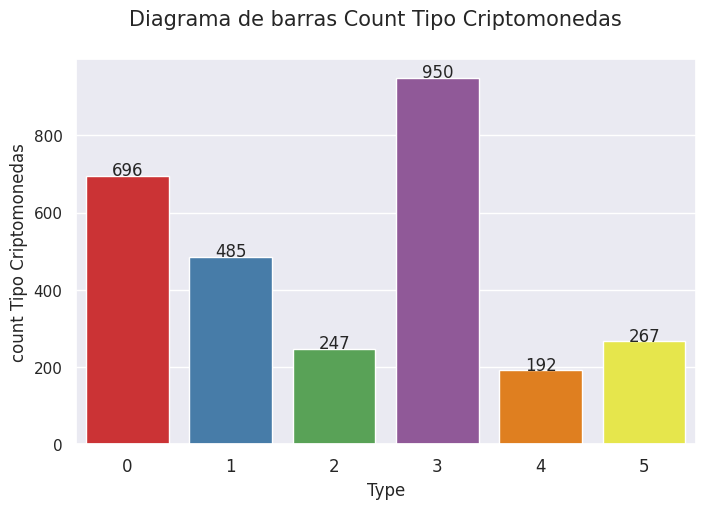

In [6]:
plot_bar(data, paleta=None, ejeX='Type',
         ejey='count Tipo Criptomonedas',
         title='Count Tipo Criptomonedas')

# **Para el ejercicio, realizaremos una clasificación de trafico entre bitcoins y litecoin**

In [7]:
data_sample = data[(data.Type == 2) | (data.Type == 5)].drop(
    'Unnamed: 0', axis=1)

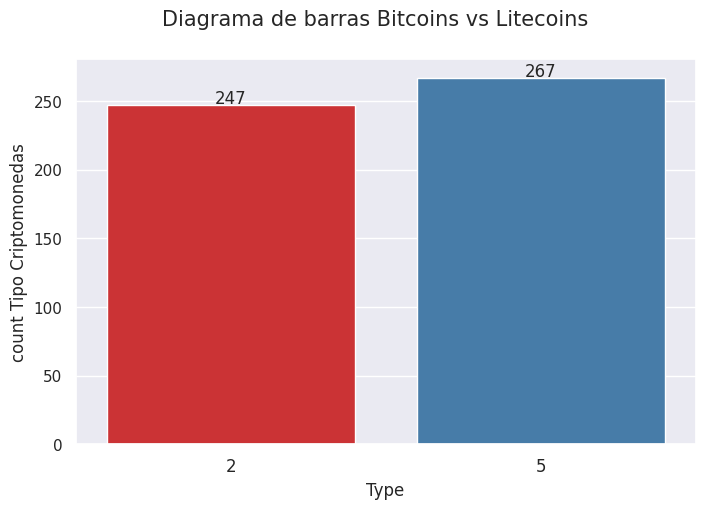

In [8]:
plot_bar(data_sample, paleta=None, ejeX='Type',ejey='count Tipo Criptomonedas',
         title='Bitcoins vs Litecoins')

- El conjunto sufre un desbalance minimo

In [9]:
data_sample.isna().sum()

Name                 0
Netflows             0
First_Protocol       0
Second_Protocol    514
Third_Protocol     514
p1_d                 0
p2_d                 0
p3_d                 0
duration             0
max_d                0
min_d                0
#packets             0
Avg_bps              0
Avg_pps              0
Avg_bpp              0
#Bytes               0
#sp                  0
#dp                  0
first_sp             0
second_sp            4
third_sp           409
first_dp             0
second_dp            4
third_dp           410
p1_ip                0
p2_ip                0
p3_ip                0
p1_ib                0
p2_ib                0
p3_ib                0
Type                 0
dtype: int64

Por cuestiones del ejercicio se eliminaran las columnas de valores nulos

In [10]:
data_sample = data_sample.drop(['third_sp', 'third_dp'], axis=1)

# Data Split
---

Si bien se puede usar las variables categoricas, por fines del ejercicio se usaran las variables cuantitativas.

In [11]:
X = data_sample.select_dtypes(['int64', 'float64'])

In [12]:
X = X.dropna()
X.isna().sum()

Netflows     0
p1_d         0
p2_d         0
p3_d         0
duration     0
max_d        0
min_d        0
#packets     0
Avg_bps      0
Avg_pps      0
Avg_bpp      0
#Bytes       0
#sp          0
#dp          0
first_sp     0
second_sp    0
first_dp     0
second_dp    0
p1_ip        0
p2_ip        0
p3_ip        0
p1_ib        0
p2_ib        0
p3_ib        0
Type         0
dtype: int64

In [13]:
y = X['Type']
X = X.iloc[:, :-1]


**Select the best features**


Se cambiara solo el criterio de impureza, en proximos ejercicios se implementaran otros hiperparametros. Se usa un ensamblador para encontrar las mejores caracteristicas.

In [14]:
model_best_feature_gini = ExtraTreesClassifier(
    n_estimators=100, criterion='gini'
)

In [15]:
data_best_gini = model_best_feature_gini.fit(X, y)

Seleccionamos las mejores caracteristicas, para implementar un metodo para la reducción de overfitting.

In [16]:
model = SelectFromModel(data_best_gini, prefit=True)

In [17]:
best_features = X[X.columns[model.get_support(indices=True)]].columns
best_features

Index(['p1_d', 'p2_d', 'p3_d', 'max_d', 'min_d', 'first_sp', 'first_dp',
       'p1_ip'],
      dtype='object')

No se implementará un proceso de estandarización, ya que el modelo es robusto ante ese tipo de casos.

In [18]:
X = X[best_features]
X

,p1_d,p2_d,p3_d,max_d,min_d,first_sp,first_dp,p1_ip
1181,114.79300,180.0435,245.27525,245.276,114.736,3332,3332,10.00
1182,196.18225,196.1895,196.19675,196.204,196.175,3332,3332,10.50
1183,244.14325,244.1435,244.14375,244.144,244.143,3332,3332,16.00
1184,244.04600,244.0460,244.04600,244.046,244.046,3332,3332,16.00
1185,246.79500,246.7950,246.79500,246.795,246.795,51915,51915,17.75
...,...,...,...,...,...,...,...,...
2832,2.15850,4.3170,6.47550,8.634,0.000,3333,3333,1.25
2833,583.36850,583.8100,584.25150,584.693,582.927,3333,3333,53.50
2834,288.55375,288.5545,288.55525,288.556,288.553,3333,3333,22.25
2835,285.37900,285.3790,285.37900,285.379,285.379,3333,3333,24.75


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=12354,
    shuffle=True,
    stratify=y
    )

In [20]:
def componentes_principales(data:object,
                            min_explained_variance:int=0.85,
                            min_component:int=3,
                            **kwards)->tuple:
  """simple method of PCA, that return data transform"""
  final_comp = 0
  for comp in range(min_component, data.shape[1]):
    pca = PCA(n_components=comp, **kwards)
    pca.fit(data)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() >= min_explained_variance:
      break

  final_pca = PCA(n_components=final_comp, **kwards)
  final_pca.fit(data)
  data_df = final_pca.transform(data)
  info = "Using {} components, we can explain {}% of the variability\
  in the original data.".format(final_comp,comp_check.sum())

  return data_df, final_pca, info


In [21]:
model = DecisionTreeClassifier(
    criterion = 'gini',
    splitter = 'best',
    max_depth = 3,
    min_samples_leaf = 5,
    random_state = 12354
)

In [22]:
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

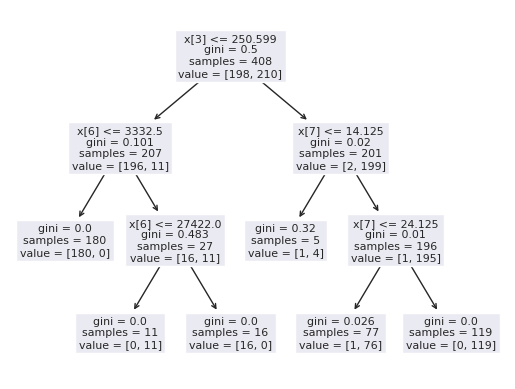

In [23]:
tree.plot_tree(model)
plt.show()

In [24]:
X.columns

Index(['p1_d', 'p2_d', 'p3_d', 'max_d', 'min_d', 'first_sp', 'first_dp',
       'p1_ip'],
      dtype='object')

In [25]:
with open("./data/miner.dot", "w") as dotfile:
  tree.export_graphviz(model, out_file=dotfile, feature_names=X.columns)
  dotfile.close()

In [26]:
!pip install graphviz

In [27]:
import os
from graphviz import Source

In [28]:
file_dot = open("./data/miner.dot", "r")
text = file_dot.read()
text

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="max_d <= 250.599\\ngini = 0.5\\nsamples = 408\\nvalue = [198, 210]"] ;\n1 [label="first_dp <= 3332.5\\ngini = 0.101\\nsamples = 207\\nvalue = [196, 11]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 180\\nvalue = [180, 0]"] ;\n1 -> 2 ;\n3 [label="first_dp <= 27422.0\\ngini = 0.483\\nsamples = 27\\nvalue = [16, 11]"] ;\n1 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 11\\nvalue = [0, 11]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 16\\nvalue = [16, 0]"] ;\n3 -> 5 ;\n6 [label="p1_ip <= 14.125\\ngini = 0.02\\nsamples = 201\\nvalue = [2, 199]"] ;\n0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n7 [label="gini = 0.32\\nsamples = 5\\nvalue = [1, 4]"] ;\n6 -> 7 ;\n8 [label="p1_ip <= 24.125\\ngini = 0.01\\nsamples = 196\\nvalue = [1, 195]"] ;\n6 -> 8 ;\n9 [label="gini = 0.026\\nsamples = 77\\nvalue = [1, 76]"] ;\n8 -> 9 ;\n10 

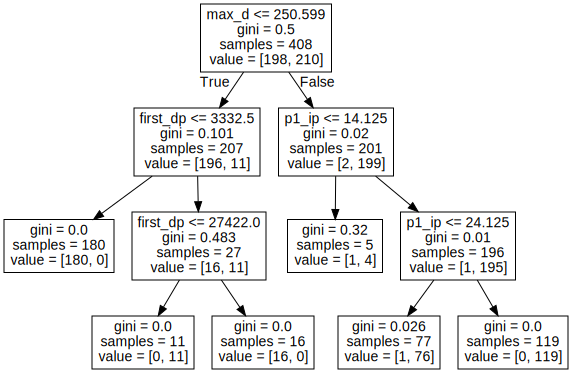

In [29]:
Source(text)

In [30]:
import matplotlib.cm
print(matplotlib.cm)

<module 'matplotlib.cm' from '/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py'>


In [31]:
def matrix_confusion(
    y_true:pd.Series,
    y_pred:pd.Series,
    labels:list=None,
    title:str='confusion matrix', **kwards)->None:
  "confusion matrix"
  try:
    churm = metrics.confusion_matrix(y_true, y_pred, labels=labels)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    sns.heatmap(churm, annot=True,  ax=ax, fmt='g', **kwards)
    ax.set_title(title,size=20)
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ax.tick_params(labelsize = 12)
  except Exception as e:
    print(e)

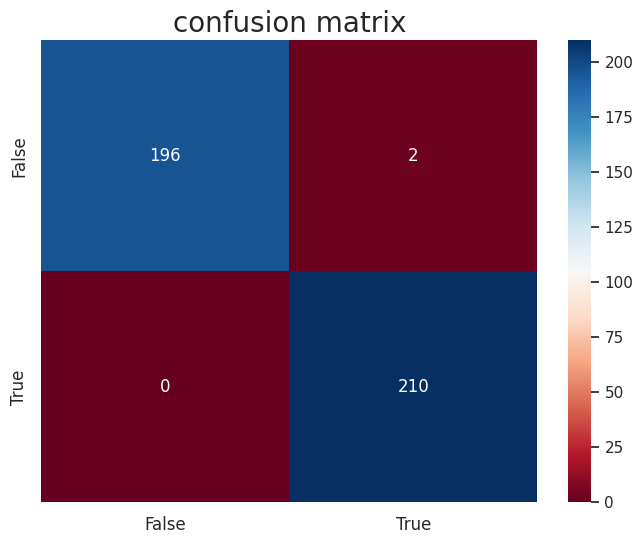

In [32]:
kward={"cmap":"RdBu",  "annot_kws":{'size': 12}}
matrix_confusion(y_train, y_predict_train, title='confusion matrix', **kward)

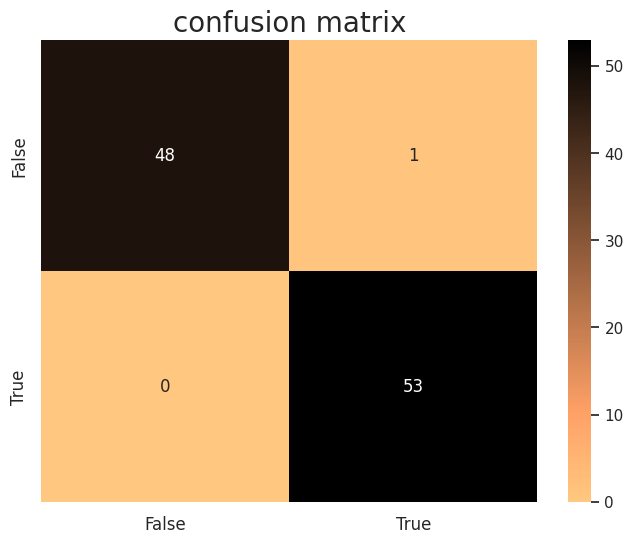

In [33]:
kward={"cmap":plt.cm.copper_r,  "annot_kws":{'size': 12}}
matrix_confusion(y_test, y_predict_test, title='confusion matrix', **kward)

- A partir de la matriz de confusión, se evidencia que el modelo se equivocó 5 veces en la distinción en registros de bitcoín y litecoin.

Se utiliza la exactitud, ya que la distinción de uno o el otro no tiene un impacto crítico, como para usar la sensibilidad o el f1-score, Además el propósito no es determinar una clase en particular, como para usar la precisión

In [34]:
 accuracy_me = metrics.accuracy_score(y_test, y_predict_test)
 accuracy_me

0.9901960784313726

In [35]:
 accuracy_me = metrics.accuracy_score(y_train, y_predict_train)
 accuracy_me

0.9950980392156863

- El modelo tiene un buen rendimiento para distinguir trafico de red entre bitcoin y litecoin, aunque parece haber un pequeño sobreajuste

# **Pospoda**
---
**Cost Complexity Pruning**
La poda de complejidad de costos se trata de encontrar el parámetro correcto para alfa.

In [36]:
model = DecisionTreeClassifier(random_state=12354)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12354)

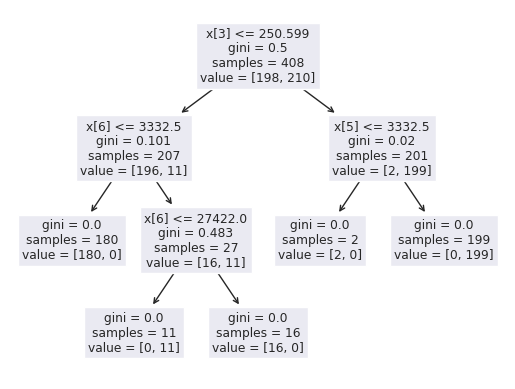

In [37]:
tree.plot_tree(model)
plt.show()

In [38]:
path = model.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00970637, 0.02552809, 0.43880493]),
 'impurities': array([0.        , 0.00970637, 0.06076254, 0.49956747])}

In [39]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [40]:
ccp_alphas[:-1]

array([0.        , 0.00970637, 0.02552809])

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

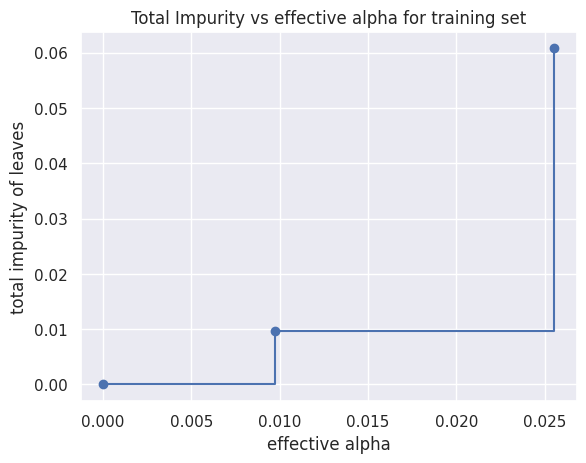

In [41]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [42]:
impurities

array([0.        , 0.00970637, 0.06076254, 0.49956747])

In [43]:
ccp_alphas

array([0.        , 0.00970637, 0.02552809, 0.43880493])

In [44]:
clfs = []
for ccp_alpha in ccp_alphas:
   clf = DecisionTreeClassifier(random_state=12354, ccp_alpha=ccp_alpha)
   clf.fit(X_train, y_train)
   clfs.append(clf)

print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

print(clfs)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.4388049326774349
[DecisionTreeClassifier(random_state=12354), DecisionTreeClassifier(ccp_alpha=0.009706370110233132, random_state=12354), DecisionTreeClassifier(ccp_alpha=0.025528085630387422, random_state=12354), DecisionTreeClassifier(ccp_alpha=0.4388049326774349, random_state=12354)]


In [45]:
model.tree_.node_count

9

Se ignora el ultimo alfa, ya que nos deja seguro la raiz del arbol, pues la penalización es agresiva.

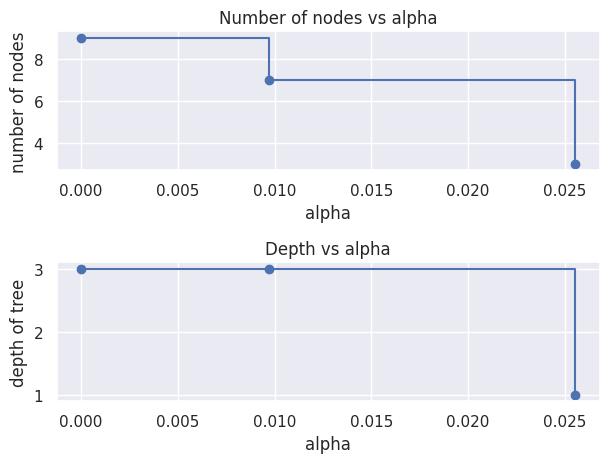

In [46]:
clfss = clfs[:-1]
ccp_alphass = ccp_alphas[:-1]
# An array with contain of number nodes of each tree
node_counts = [clf.tree_.node_count for clf in clfss]
# An array with contain of the deep each tree
depth = [clf.tree_.max_depth for clf in clfss]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphass, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphass, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

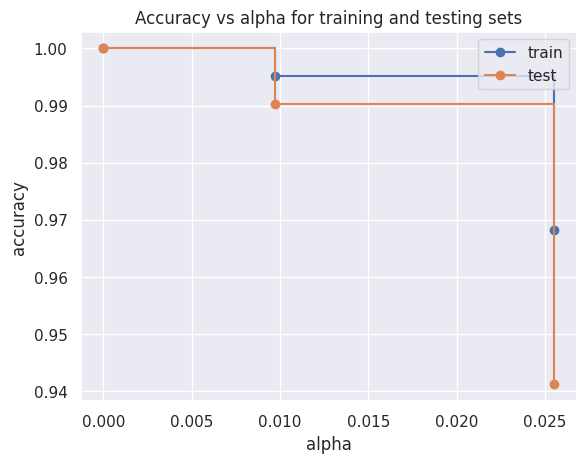

In [47]:
train_scores = [clf.score(X_train, y_train) for clf in clfs[:-1]]
test_scores = [clf.score(X_test, y_test) for clf in clfs[:-1]]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[:-1], train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

- Seleccionamos el alpha 0.010 que permite la maxima exactitud de prueba del 99 junto a una exactitud del 99%.

In [48]:
ccp_alphas

array([0.        , 0.00970637, 0.02552809, 0.43880493])

In [49]:
model = DecisionTreeClassifier(random_state=12354, ccp_alpha=0.0098)
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

In [50]:
metrics.accuracy_score(y_train, y_predict_train)

0.9950980392156863

In [51]:
metrics.accuracy_score(y_test, y_predict_test)

0.9901960784313726

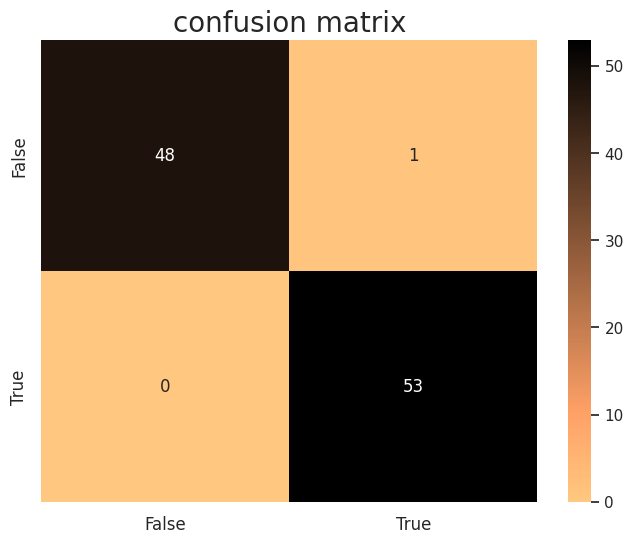

In [52]:
kward={"cmap":plt.cm.copper_r,  "annot_kws":{'size': 12}}
matrix_confusion(y_test, y_predict_test, title='confusion matrix', **kward)

- Se debe recordar que el modelo se entrenó con un conjunto de datos pequeño, con técnicas de reducción de dimensionalidad, entre otros factores, permitieron que el modelo aprendiera de manera eficiente, y los efectos de la pos poda costo mínimo de complejidad, no se aprecie de manera significativa.